## PROBLEM STATEMENT
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

## Tasks to be done

-  Which store has maximum sales
-  Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out co-efficient of variance
-  Which store/s has good quarterly growth rate in Q3’2012
-  Some holidays have a negative impact on sales. Finding out holidays which have higher sales than the mean sales in non-holiday season for all stores together
-  Providing a monthly and semester view of sales in units and give insights


In [1]:
#importing required Libraries .
import pandas as pd 
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Walmart_Store_sales.csv") #importing the dataset 
data 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
data.head() #printing the first five rows

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.tail() #printing the last five rows

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
data.size #printing the size of the dataset

51480

In [7]:
data.shape #printing the shape of the dataset

(6435, 8)

In [8]:
data.isnull().sum() #checking for the missing values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
print(data.info()) #gives basic information about the data set like number of null values in the particular columns and data types of that columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [10]:
data.describe() #it provides statistical data of our dataset

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [11]:
data.max() #Finds the Maximum value in each column

Store                   45
Date            31-12-2010
Weekly_Sales    3818686.45
Holiday_Flag             1
Temperature         100.14
Fuel_Price           4.468
CPI             227.232807
Unemployment        14.313
dtype: object

In [12]:
data.loc[data['Weekly_Sales'] ==  data['Weekly_Sales'].max()] #it is used to analyze the Weekly_Sales ,to findout which particular store is having the maximum sales in that week.

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


Store 14 has the maximum weekly sales.

In [13]:
max_sales = data.groupby('Store')['Weekly_Sales'].sum()
max_sales.idxmax()

20

From this , we can conclude that store 20 has overall maximum sales , now we can we visualise it with bar plot(univariate analysis)

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

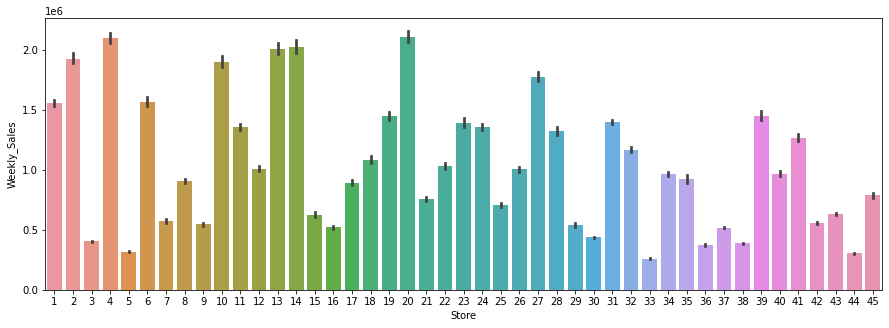

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=data.Store, y = data.Weekly_Sales)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d0bdd291c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0bdd29820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0bdd17d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1d0bdd29f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d0bdd36340>],
 'means': []}

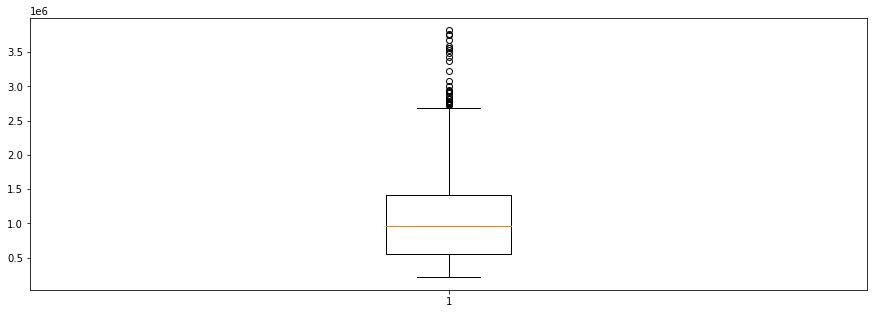

In [15]:
plt.figure(figsize=(15,5))
plt.boxplot(data.Weekly_Sales)

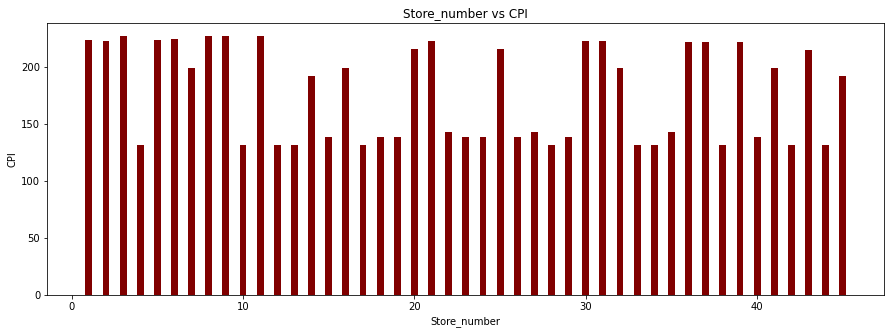

In [16]:
plt.figure(figsize=(15,5))
plt.bar(data.Store , data.CPI , color = 'maroon' , width = 0.4)
plt.xlabel("Store_number")
plt.ylabel("CPI")
plt.title("Store_number vs CPI")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d0c28d23a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0c28d2ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0c28c6fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d0c28de220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d0c28de5b0>],
 'means': []}

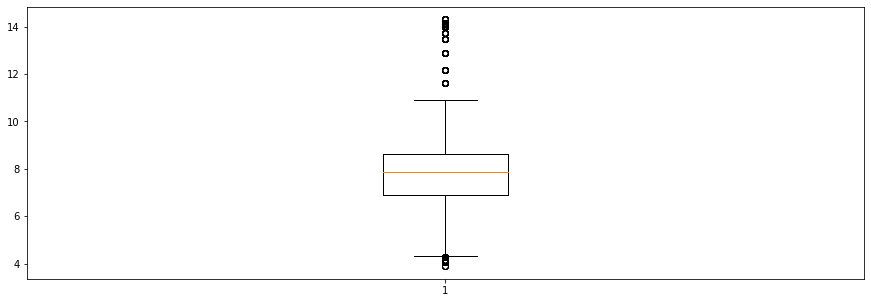

In [17]:
plt.figure(figsize=(15,5))
plt.boxplot(data.Unemployment)

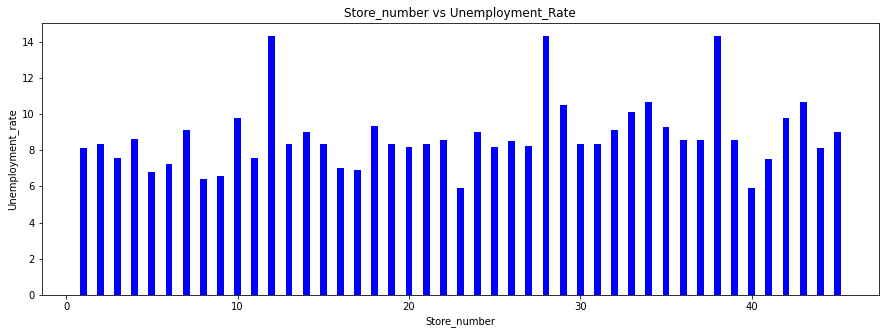

In [18]:
plt.figure(figsize=(15,5))
plt.bar(data.Store , data.Unemployment , color = 'blue' , width = 0.4)
plt.xlabel("Store_number")
plt.ylabel("Unemployment_rate")
plt.title("Store_number vs Unemployment_Rate")
plt.show()

In [19]:
data.duplicated().any() #there is no duplicated row in the dataset

False

In [20]:
#Here i am grouping by store and finding the standard deviation and mean of each store.
maxstd=pd.DataFrame(data.groupby('Store').agg({'Weekly_Sales':['std','mean']}))

#Just resetting the index.
maxstd = maxstd.reset_index()

#Now we know that CoV is std/ mean we are doing this for each store.
maxstd['CoV'] =(maxstd[('Weekly_Sales','std')]/maxstd[('Weekly_Sales','mean')]) *100

#finding the store with maximum standard deviation.
maxstd.loc[maxstd[('Weekly_Sales','std')]==maxstd[('Weekly_Sales','std')].max()]

Store   Weekly_Sales                      CoV
                    std          mean           
13    14  317569.949476  2.020978e+06  15.713674

we can conclude that sales in store 14 vary a lot

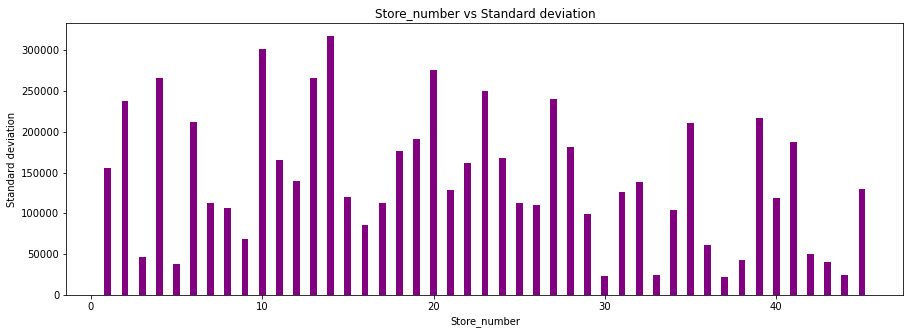

In [21]:
plt.figure(figsize=(15,5))
plt.bar(maxstd.Store , maxstd[("Weekly_Sales" , "std")] , color = 'purple' , width = 0.4)
plt.xlabel("Store_number")
plt.ylabel("Standard deviation")
plt.title("Store_number vs Standard deviation")
plt.show()

In [22]:
#Converting the data type of date column to dateTime 
data['Date'] = pd.to_datetime(data['Date'])

#defining the start and end date of Q3 and Q2
Q3_date_from = pd.Timestamp(date(2012,7,1))
Q3_date_to = pd.Timestamp(date(2012,9,30))
Q2_date_from = pd.Timestamp(date(2012,4,1))
Q2_date_to = pd.Timestamp(date(2012,6,30))

#Collecting the data of Q3 and Q2 from original dataset.
Q2data=data[(data['Date'] > Q2_date_from) & (data['Date'] < Q2_date_to)]
Q3data=data[(data['Date'] > Q3_date_from) & (data['Date'] < Q3_date_to)]

#finding the sum of the weekly sales of each store in Q2
Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace=True)

#finding the sum weekly sales of each store in Q3
Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'},inplace=True)

#merging Q2 and Q3 data on Store as a common column
Q3_Growth= Q2.merge(Q3,how='inner',on='Store')

In [23]:
#Calculating Growth rate of each Store and collecting it into a dataframe  
Q3_Growth['Growth_Rate'] =(Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales'])/Q3_Growth['Q2_Weekly_Sales']
Q3_Growth['Growth_Rate']=round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate')

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
13,14,24427769.06,20140430.40,-0.18
44,45,10278900.05,8851242.32,-0.14
35,36,4090378.90,3578123.58,-0.13
28,29,7034493.19,6127862.07,-0.13
4,5,4427262.21,3880621.88,-0.12
5,6,20728970.16,18341221.11,-0.12
8,9,7431320.13,6528239.56,-0.12
14,15,7867952.23,6909374.37,-0.12
37,38,5732362.70,5129297.64,-0.11
33,34,12858027.98,11476258.98,-0.11


we can infer that Q3 growth rate is in losses .

In [24]:
Q3_Growth.sort_values('Growth_Rate',ascending=False).head(1) #min loss in growth rate

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-0.03


In [25]:
Q3_Growth.sort_values('Growth_Rate',ascending=False).tail(1) #max loss in growth rate

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
13,14,24427769.06,20140430.4,-0.18


the Store 16 has the least loss of 3% compared the other stores and store 14 has highest loss of 18%.

In [26]:
data.groupby('Holiday_Flag')['Weekly_Sales'].mean() #finding the mean of sales of non holiday and holiday 

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [27]:
data['year'] = pd.DatetimeIndex(data['Date']).year

<AxesSubplot:title={'center':'Year vs Weekly Sales'}, xlabel='year'>

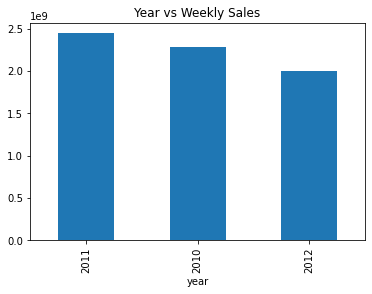

In [28]:
data.groupby(['year'])['Weekly_Sales'].sum().sort_values(ascending=False).plot.bar(x="Year", y="Weekly Sales", title="Year vs Weekly Sales")

In [29]:
#marking tthe holiday dates 
Christmas1 = pd.Timestamp(date(2010,12,31) )
Christmas2 = pd.Timestamp(date(2011,12,30) )
Christmas3 = pd.Timestamp(date(2012,12,28) )
Christmas4 = pd.Timestamp(date(2013,12,27) )

Thanksgiving1=pd.Timestamp(date(2010,11,26) )
Thanksgiving2=pd.Timestamp(date(2011,11,25) )
Thanksgiving3=pd.Timestamp(date(2012,11,23) )
Thanksgiving4=pd.Timestamp(date(2013,11,29) )

LabourDay1=pd.Timestamp(date(2010,2,10) )
LabourDay2=pd.Timestamp(date(2011,2,9) )
LabourDay3=pd.Timestamp(date(2012,2,7) )
LabourDay4=pd.Timestamp(date(2013,2,6) )

SuperBowl1=pd.Timestamp(date(2010,9,12) )
SuperBowl2=pd.Timestamp(date(2011,9,11) )
SuperBowl3=pd.Timestamp(date(2012,9,10) )
SuperBowl4=pd.Timestamp(date(2013,9,8) )

#Calculating the mean sales during the holidays
Christmas_mean_sales=data[(data['Date'] == Christmas1) | (data['Date'] == Christmas2) | (data['Date'] == Christmas3) | (data['Date'] == Christmas4)]
Thanksgiving_mean_sales=data[(data['Date'] == Thanksgiving1) | (data['Date'] == Thanksgiving2) | (data['Date'] == Thanksgiving3) | (data['Date'] == Thanksgiving4)]
LabourDay_mean_sales=data[(data['Date'] == LabourDay1) | (data['Date'] == LabourDay2) | (data['Date'] == LabourDay3) | (data['Date'] == LabourDay4)]
SuperBowl_mean_sales=data[(data['Date'] == SuperBowl1) | (data['Date'] == SuperBowl2) | (data['Date'] == SuperBowl3) | (data['Date'] == SuperBowl4)]

#printing this information in dictionary
list_of_mean_sales = {'Christmas_mean_sales' : round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
'Thanksgiving_mean_sales': round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
'LabourDay_mean_sales' : round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
'SuperBowl_mean_sales':round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),
'Non holiday weekly sales' : data[data['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()}
list_of_mean_sales

{'Christmas_mean_sales': 960833.11,
 'Thanksgiving_mean_sales': 1471273.43,
 'LabourDay_mean_sales': 1008369.41,
 'SuperBowl_mean_sales': nan,
 'Non holiday weekly sales': 1041256.3802088564}

we can infer that the mean sales of thanks giving is more than the non holiday weekly sales .

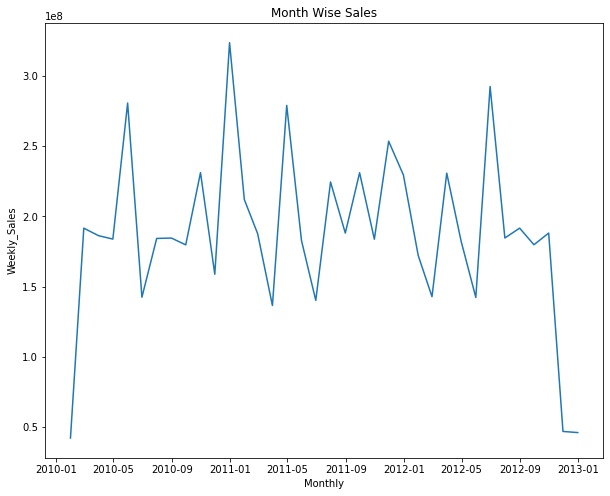

In [30]:
#Monthly sales 
monthly = data.groupby(pd.Grouper(key='Date', freq='1M')).sum() #grouping by each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')
plt.show()

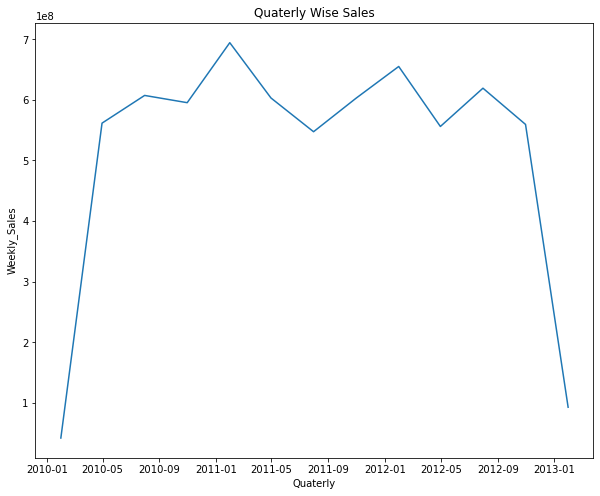

In [31]:
#Quarterly Sales 
Quaterly = data.groupby(pd.Grouper(key='Date', freq='3M')).sum()
Quaterly = Quaterly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Quaterly['Date']
Y = Quaterly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Quaterly Wise Sales')
plt.xlabel('Quaterly')
plt.ylabel('Weekly_Sales')
plt.show()

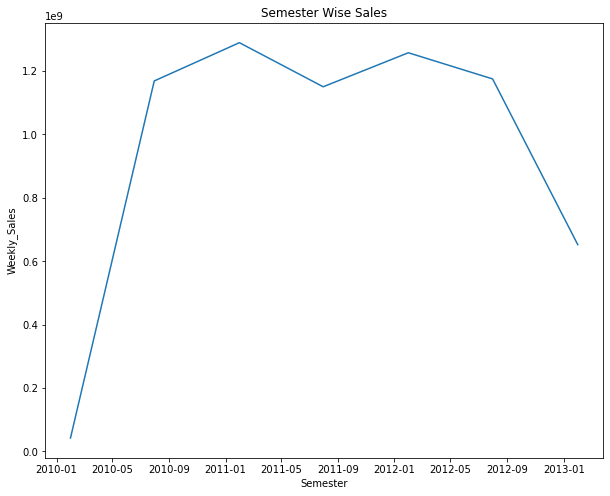

In [32]:
#Semester Sales 
Semester = data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')
plt.show()

In [33]:
hypothesis = data.groupby('Store')[['Fuel_Price','Unemployment', 'CPI','Weekly_Sales', 'Holiday_Flag']]
factors  = hypothesis.get_group(1) #Filter by Store 1
day_arr = [1]
for i in range (1,len(factors)):
    day_arr.append(i*7)
    
factors['Day'] = day_arr.copy()
factors

C:\Users\HP\AppData\Local\Temp/ipykernel_13380/1679338161.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factors['Day'] = day_arr.copy()


,Fuel_Price,Unemployment,CPI,Weekly_Sales,Holiday_Flag,Day
0,2.572,8.106,211.096358,1643690.90,0,1
1,2.548,8.106,211.242170,1641957.44,1,7
2,2.514,8.106,211.289143,1611968.17,0,14
3,2.561,8.106,211.319643,1409727.59,0,21
4,2.625,8.106,211.350143,1554806.68,0,28
...,...,...,...,...,...,...
138,3.666,6.908,222.981658,1437059.26,0,966
139,3.617,6.573,223.181477,1670785.97,0,973
140,3.601,6.573,223.381296,1573072.81,0,980
141,3.594,6.573,223.425723,1508068.77,0,987


<AxesSubplot:>

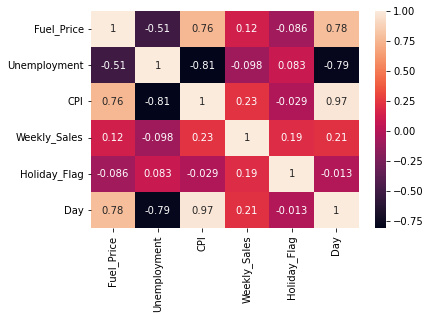

In [34]:
sns.heatmap(factors.corr(), annot = True)

In [35]:
df = data.copy()

Text(0.5, 0, 'Stores')

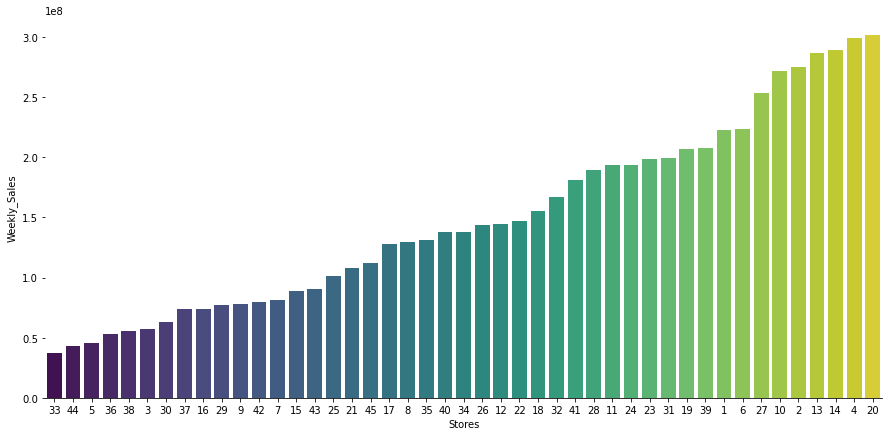

In [36]:
sales_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.barplot(x='Store', y='Weekly_Sales', data=sales_store, order=sales_store.sort_values('Weekly_Sales').Store, ax = ax,
           palette = 'viridis')

for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Weekly_Sales')
ax.set_xlabel('Stores')



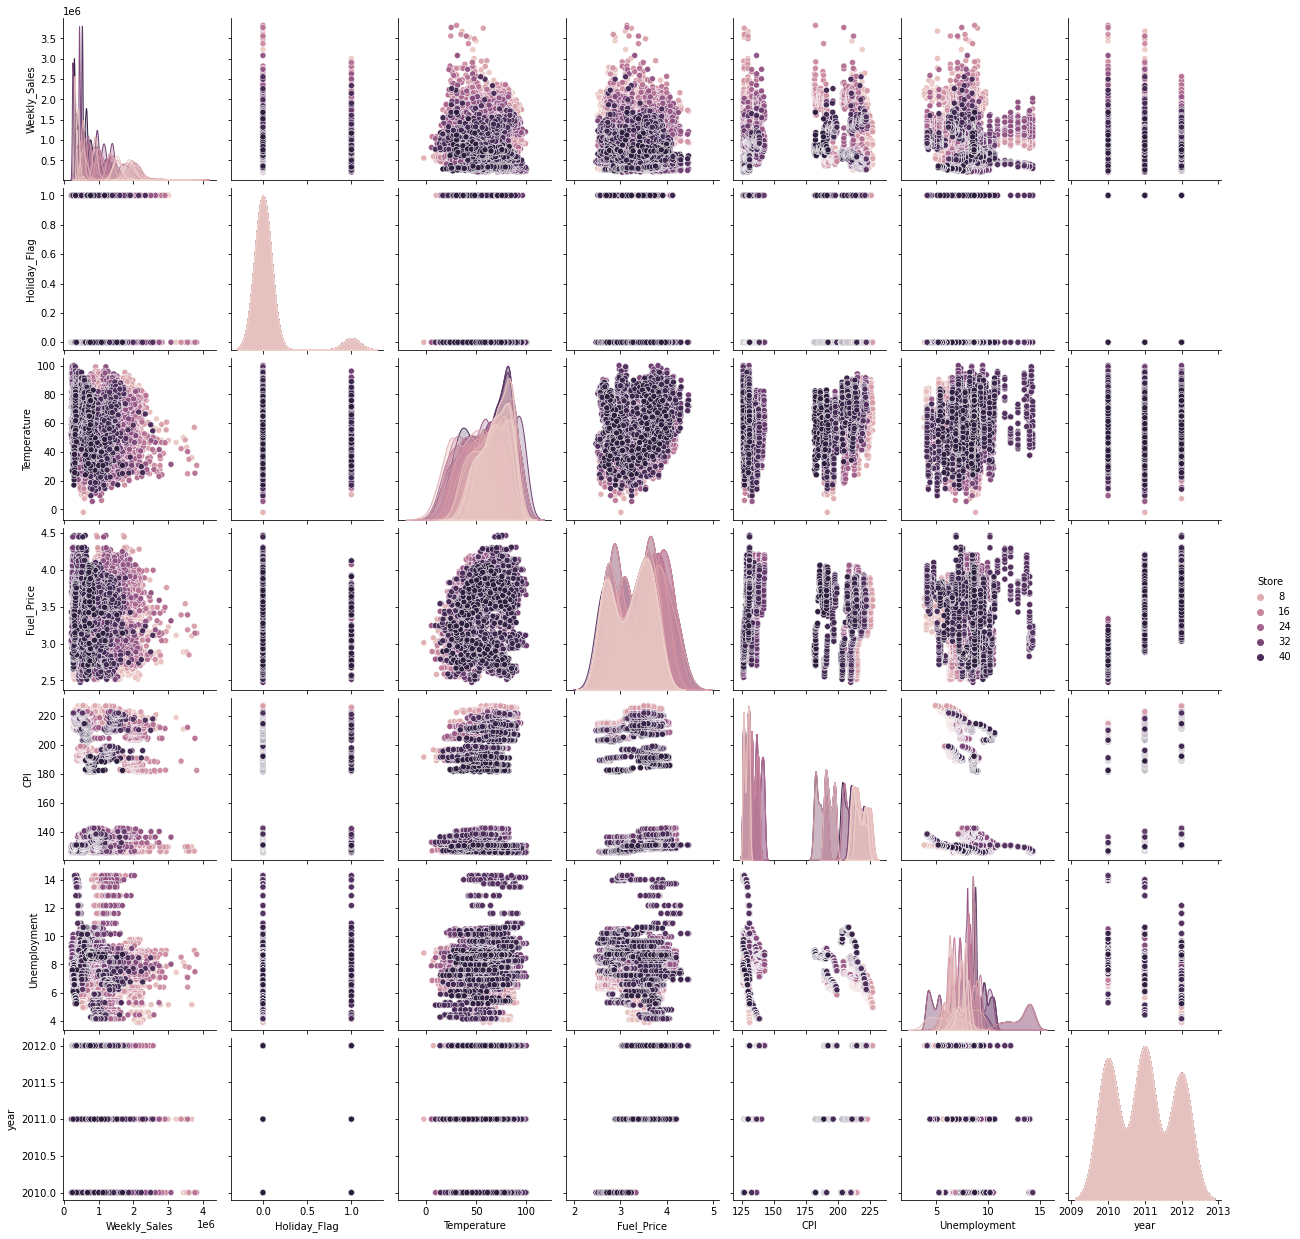

In [38]:
plts = sns.pairplot(df , hue = 'Store')
plt.show()

### Overall Insights:
•	From the overall analysis of the dataset , I have found out that Store 14 has highest weekly sales in one of the week and also it is the store which has highest standard deviation .
•	Store 20 has the overall highest sales .
•	We can see that from 2010 to 2011 the sales raised but from 2011 to 2012 , the sales got low because of some issues in stock in some stores.
•	The Holiday weeks also impacted the sales a lot , Thanksgiving Holiday event was the highest one to get the large revenue . But in the other side (non-holiday date), sales tend to be in stagnant position .
•	Because of these Holiday events(Thanksgiving and Christmas) ,November and December are the months which have the highest sales .

### Conclusion:
•	Holiday event’s week have sales almost five times the non holiday weeks , it has given the good response .
•	Also we need to make sure that non holiday weeks should have to improve their sales because some stores have very low weekly sales . This can be improved by conducting small fests or giving ample discounts or offers .
•	The management should also focus on marketing , Promotions so that there will be increase in sales on non Holiday weeks.
•	The management should also specifically choose a day in the week , so that they can give offers on that day which will boost in their sales .
•	There was a problem of out of stock in some of the stores this needed to be taken care of by careful scrutinizing of the sales in the respective stores , especially in the store 20 , store 14 etc.
•	The stores where unemployment rate is a factor for lowering in sales , we can plan of selling goods by reducing the price by some factor because the CPI of these areas is low , people were not able to buy the products with high costs . This can improve the sales in these areas’ stores.